# heatmap

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.heatmap()` библиотеки *seaborn* используется для создания тепловых карт (heatmaps). Тепловые карты - это инструмент визуализации, позволяющий отображать данные в виде цветной матрицы, где каждая ячейка окрашена в зависимости от её значения. Этот вид диаграмм может быть полезен для визуализации корреляционных матриц и других двумерных наборов данных.

Основные параметры:
- `data`: двумерный массив или DataFrame, который будет визуализироваться;
- `vmin` и `vmax`: минимальные и максимальные значения для цветовой шкалы. По умолчанию vmin и vmax задаются автоматически на основе минимальных и максимальных значений данных;
- `cmap`: цветовая карта для отображения значений;
- `center`: параметр center задает центральное значение для цветовой шкалы;
- `square`: когда square=True, каждая ячейка в тепловой карте будет квадратной (по умолчанию square=False);
- `robust`: когда robust=True, цветовая шкала определяется на основе 2-го и 98-го процентилей данных, а не минимального и максимального значений (по умолчанию robust=False). Полезно использовать, когда в данных есть выбросы, которые могут искажать визуализацию, создавая слишком широкий диапазон значений для цветовой шкалы;
- `annot`: если установлено в True, то на ячейках будут отображаться числовые значения;
- `annot_kws`: используется для настройки аннотаций (текстовых меток), отображаемых внутри ячеек тепловой карты;
- `fmt`: формат строк для аннотаций. Например, 'd' для целых чисел, '.2f' для чисел с двумя знаками после запятой;
- `linewidths`: толщина линий, разделяющих ячейки;
- `linecolor`: цвет линий, разделяющих ячейки;
- `cbar`: если установлено в True, то будет отображаться цветовая шкала (color bar);
- `cbar_kws`: словарь с параметрами для настройки цветовой шкалы;
- `xticklabels` и `yticklabels`: метки для осей X и Y. Можно передать список меток, или использовать True для автоматической генерации меток на основе данных;
- `mask`: булева матрица такого же размера, как и данные. Если элемент маски равен True, то соответствующая ячейка будет скрыта;
- `ax`: позволяет указать оси (axes) matplotlib, на которых будет построен график.

Загружаем данные для рассмотрения примеров:

In [3]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Содержание датафрейма:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля.

Функция `sns.heatmap()` не имеет параметров `x` и `y`, она самостоятельно производит разбивку переменных по осям. Поэтому не любой датафрейм можно передать на вход функции `sns.heatmap()`, иногда требуется его предварительная предобработка. Например, если наш датафрейм без предобработки передать этой функции, то произойдёт ошибка, так как он содержит столбцы со строковыми значениями.

Давайте передадим функции `sns.heatmap()` наш датафрейм, очищенный от строковых значений, и посмотрим, как отработает эта функция:

In [5]:
display(df.select_dtypes(include=['number']))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


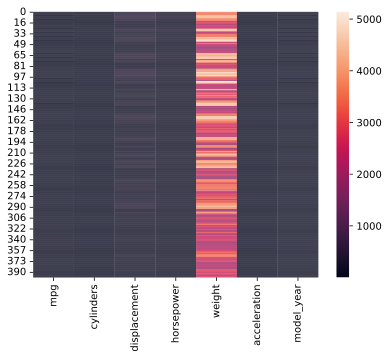

In [6]:
sns.heatmap(df.select_dtypes(include=['number']));

В итоге получаем нечто неинформативное. Поэтому, предварительно создадим сводную таблицу, столбцы которой будут содержать информацию по регионам, а строки - по количеству цилиндров:

In [7]:
df1 = df.pivot_table(values='horsepower', index='cylinders', 
                     columns='origin', aggfunc='count', fill_value=0)
display(df1)

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,61,69,69
5,3,0,0
6,4,6,73
8,0,0,103


Теперь на этих данных построим диаграмму `heatmap`:

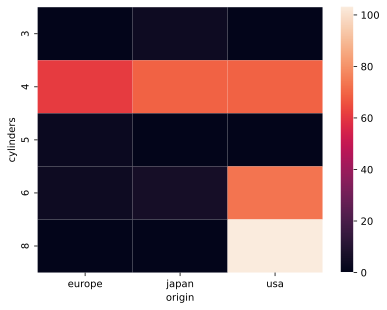

In [8]:
sns.heatmap(df1)

plt.show()

В итоге мы получает тепловую карту, где каждое пересечение переменных - это ячейка, окрашенная в тот или иной цвет. В данной цветовой палитре, чем темнее ячейка - тем меньшее количество данных она отображает.

**Параметр cmap**

Параметр `cmap` функции `sns.heatmap()` применяется для задания цветовой палитры, которая определяет цвета, используемые для отображения значений в тепловой карте.

Для примера изменим цветовую палитру тепловой карты на зелёную:

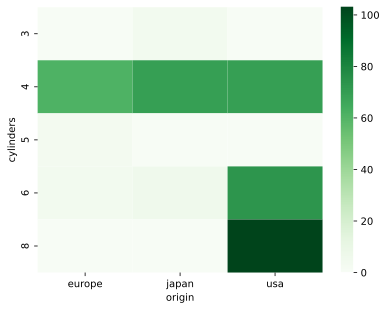

In [9]:
sns.heatmap(df1,
            cmap='Greens')
plt.show()

**Параметр annot**

Параметр `annot` добавляет аннотацию к ячейкам тепловой карты. Аннотации представляют собой текст, который отображается в каждой ячейке тепловой карты, что позволяет визуализировать числовые значения данных непосредственно на графике. По умолчанию `annot=False`.

Добавим подписи ячейкам:

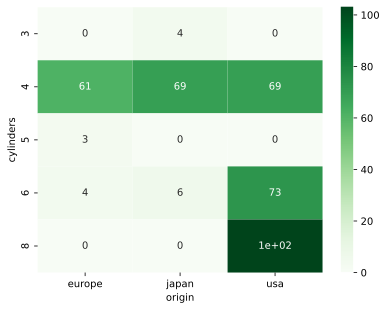

In [10]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True)
plt.show()

Число в одной из ячеек, в той, которая отвечает за информацию о восьмицилиндровых автомобилях из США, отобразилось в научном формате. За управление форматом выводимых чисел отвечает параметр `fmt`. Чтобы в ячейках тепловой карты отображались целочисленные значения, нужно этому параметру передать атрибут `'d'` или `'.0f'`. Например:

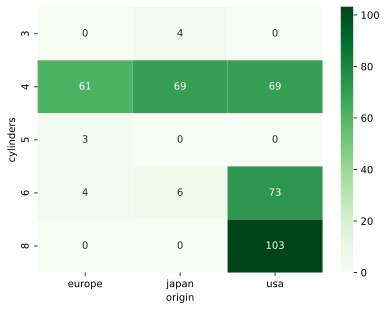

In [11]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='d')
plt.show()

А чтобы на тепловой карте отображались числа с плавающей точкой, параметру fmt следует передать нужное количество знаков после "запятой". Например, отобразим на диаграмме числа с сотыми долями (`fmt='.2f'`):

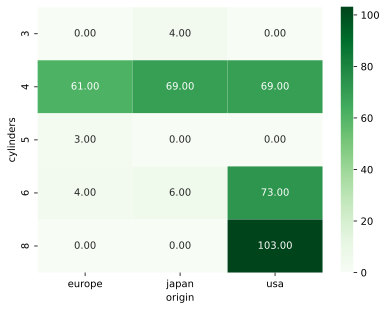

In [12]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.2f')
plt.show()

В наших данных, из-за того что на диаграмме содержится разное количество переменных по осям (по оси X три переменные, а по оси Y пять), - ячейки диаграммы имеют прямоугольную форму. Если вы захотите, чтобы ячейки приняли квадратную форму, то используйте параметр `square`, которому в этом случае передаётся значение `True`:

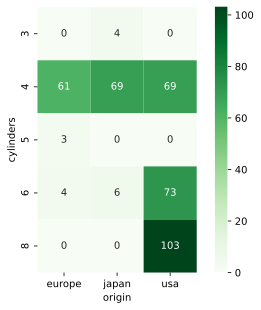

In [13]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='d',
            square=True)
plt.show()

**Параметр annot_kws**

Параметр `annot_kws` функции `sns.heatmap()` используется для настройки аннотаций, отображаемых внутри ячеек тепловой карты.

Параметр `annot_kws` принимает словарь с ключами и значениями, которые соответствуют параметрам текстовых меток *matplotlib*. Вот несколько ключевых параметров, которые можно использовать:
- `fontsize`: размер шрифта аннотаций;
- `fontstyle`: стиль шрифта аннотаций (например, 'italic');
- `fontweight`: толщина шрифта (например, 'bold');
- `fontfamily`: вид шрифта (например, 'serif');
- `color`: цвет текста аннотаций;
- `alpha`: прозрачность текста аннотаций;
- `rotation`: угол поворота текста аннотаций;
- `horizontalalignment`: горизонтальное выравнивание текста;
- `verticalalignment`: вертикальное выравнивание текста.

Увеличение размера шрифта в ячейках:

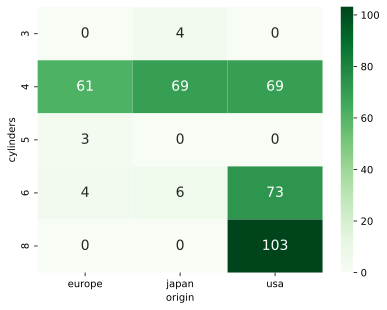

In [14]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 14})
plt.show()

Применение жирного шрифта:

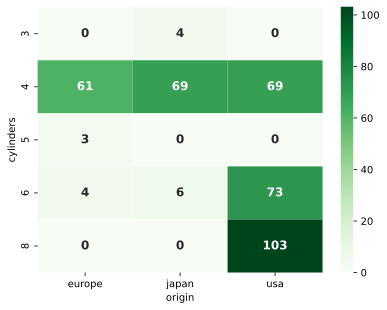

In [15]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 12, 
                       'fontweight': 'bold'})
plt.show()

Изменение типа шрифта:

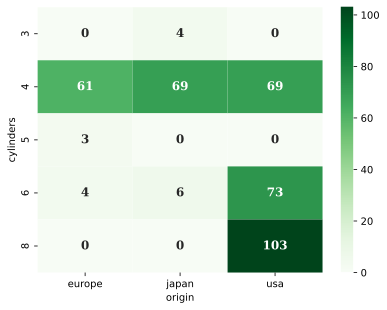

In [16]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 12, 
                       'fontweight': 'bold',
                       'fontfamily': 'serif'})
plt.show()

Изменение цвета шрифта:

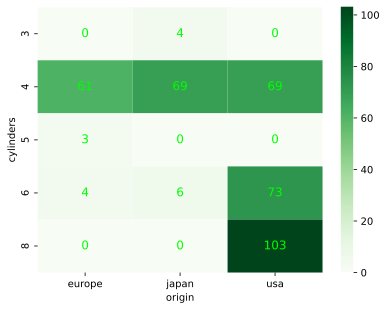

In [17]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 12,
                       'color': 'lime'})
plt.show()

Для изменения размера шрифта меток и наименований осей, используйте функции библиотеки *matplotlib*, такие как: `plt.xticks()` и `plt.yticks()` - для форматирования меток осей; `plt.xlabel()` и `plt.ylabel()` - для форматирования наименований осей.

Например, увеличим размер шрифта меток осей

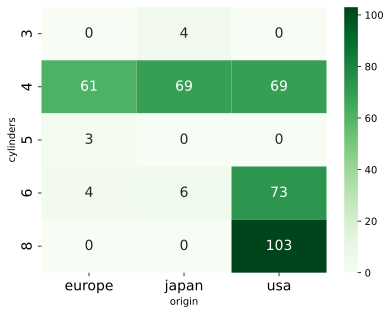

In [18]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 14})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

И увеличим размер шрифта наименований осей:

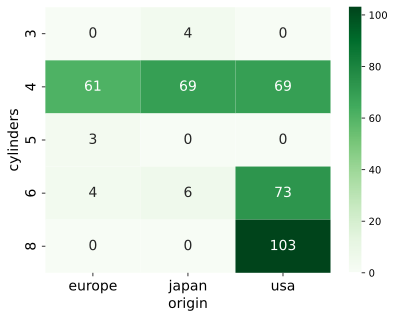

In [19]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 14})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(df1.columns.name, fontsize=14)
plt.ylabel(df1.index.name, fontsize=14)

plt.show()

В данном случае, функциям `plt.xlabel()` и `plt.ylabel()` мы также передали имена, которые следует присвоить осям: `df1.columns.name` для оси `X` (`'cylinders'`) и `df1.index.name` для оси `Y` (`'origin'`).

Или, например, по оси `X` не будем отражать наименование, а для оси `Y` присвоим название на русском языке:

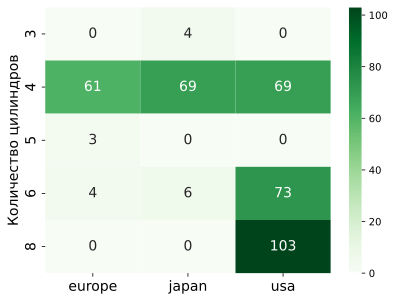

In [20]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 14})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Количество цилиндров", fontsize=14)

plt.show()

Отметим также, что изменить наименования меток осей можно и через параметры `xticklabels` и `yticklabels` функции `sns.heatmap()`. Например, изменим метки на оси абсцисс:

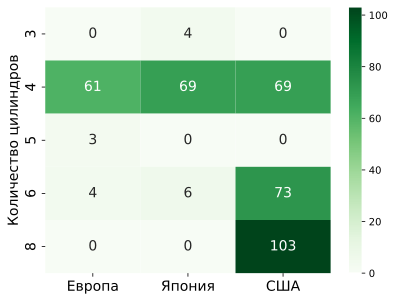

In [21]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 14},
            xticklabels=['Европа', 'Япония', 'США'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Количество цилиндров", fontsize=14)

plt.show()

В некоторых случаях может пригодиться параметр `rotation`. Например, когда данные не влезают полностью в ячейки, как, например,  продемонстрировано в следующем примере:

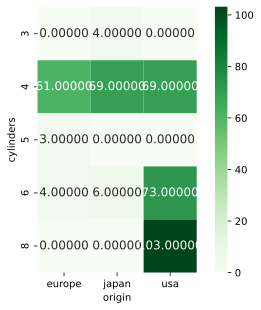

In [22]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.5f',
            square=True,
            annot_kws={'fontsize': 12})
plt.show()

Тогда можно применить `rotation` и изменить угол наклона аннотаций:

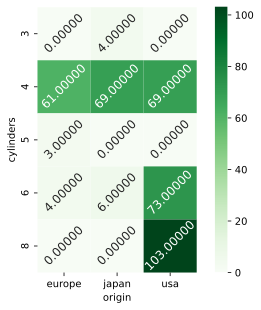

In [23]:
sns.heatmap(df1,
            cmap='Greens',
            annot=True,
            fmt='.5f',
            square=True,
            annot_kws={'fontsize': 12, 'rotation': 45})
plt.show()

**Построение корреляционной тепловой карты**

Корреляционная тепловая карта - это визуализация, которая используется для отображения матрицы корреляций между различными переменными. Корреляция измеряет степень зависимости между двумя переменными и варьируется от -1 до 1. Значения корреляции, близкие к 1, указывают на сильную положительную связь, значения, близкие к -1, указывают на сильную отрицательную связь, а значения, близкие к 0, указывают на отсутствие связи. Корреляционные тепловые карты позволяют быстро и наглядно увидеть взаимосвязи между множеством переменных.

Для начала создадим корреляционную таблицы при помощи метода `corr()`:

In [24]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


В итоге мы получаем корреляционную матрицу для всех числовых столбцов в нашем датафрейме. И далее эту матрицу передаём функции `sns.heatmap()`, которая построит нам корреляционную тепловую карту:

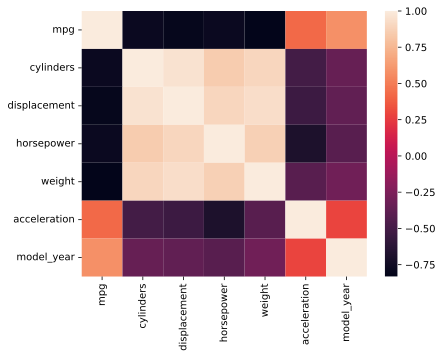

In [25]:
sns.heatmap(df.corr(numeric_only=True))

plt.show()

Такой вид будет иметь корреляционная тепловая карта с параметрами по умолчанию. Давайте добавим аннотацию и изменим цветовую палитру:

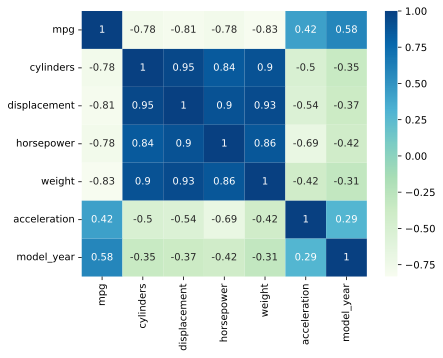

In [26]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='GnBu',
            annot=True)
plt.show()

Как вы можете заметить, цветовая шкала начинается не с -1, а с -0.75, так как в нашем случае нет значений, близких к -1. Используя параметры `vmin` и `vmax`, на шкале можно принудительно отображать значения от `vmin` до `vmax`. Для примера покажем шкалу от -1 до +1:

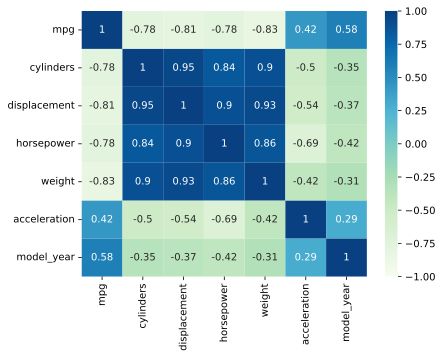

In [27]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='GnBu',
            annot=True,
            vmin=-1,
            vmax=1)
plt.show()

**Параметр mask**

Параметр `mask` функции `sns.heatmap()` используется для скрытия определённых ячеек в тепловой карте. Это позволяет исключить из отображения ненужные или незначимые данные, например, такие как значения на главной диагонали корреляционной тепловой карты.

Параметр `mask` принимает булев массив (или DataFrame) той же формы, что и данные, переданные в `sns.heatmap()`. В этом массиве значения `True` указывают на ячейки, которые должны быть скрыты, а значения `False` - на ячейки, которые должны быть отображены.

Для примера, уберём главную диагональ, которая не несёт в себе никакой информационной нагрузки. Для этого сначала создадим массив при помощи функции библиотеки *NumPy* - `np.eye()`, который в главной диагонали будет содержать единицы или значения `True`.

In [28]:
mask = np.eye(df.corr(numeric_only=True).shape[0])

display(mask)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

или:

In [29]:
mask = np.eye(df.corr(numeric_only=True).shape[0], dtype=bool)

display(mask)

array([[ True, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False, False,  True, False],
       [False, False, False, False, False, False,  True]])

И далее этот массив-маску передаём параметру `mask`:

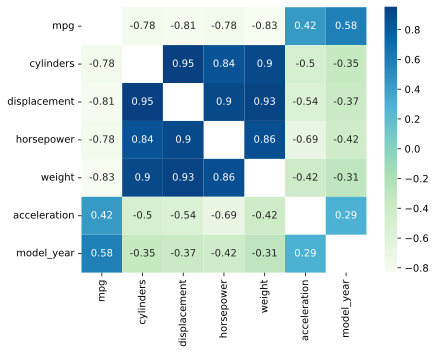

In [30]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='GnBu',
            annot=True,
            mask=mask)
plt.show()

И на выходе получаем тепловую карту без единиц на главной диагонали.

**Параметры linewidths и linecolor**

В функции `sns.heatmap()` параметры `linewidths` и `linecolor` используются для настройки внешнего вида линий, разделяющих ячейки тепловой карты.

Параметр `linewidths` определяет толщину линий, которые разделяют ячейки тепловой карты:

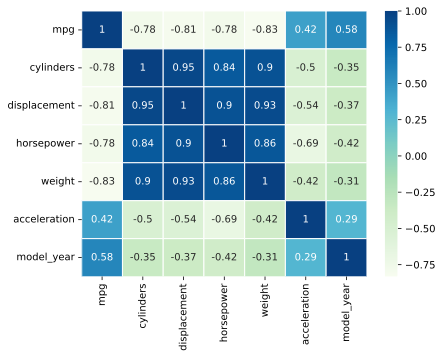

In [31]:
sns.heatmap(df.corr(numeric_only=True), 
            cmap='GnBu',
            annot=True,
            linewidths=1)
plt.show()

Параметр `linecolor` определяет цвет линий, разделяющих ячейки тепловой карты:

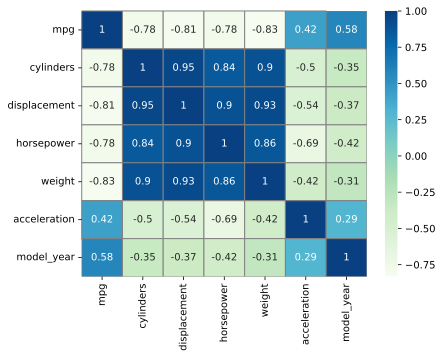

In [32]:
sns.heatmap(df.corr(numeric_only=True), 
            cmap='GnBu',
            annot=True,
            linewidths=1,
            linecolor='grey')
plt.show()